## Linear Regression - Introduction

Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- The relationship between each feature and the response is a straight line when we keep other features constant.
- The slope of this line does not depend on the values of the other variables.
- The effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

## Imports & Settings

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [26]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

#### Generate random data

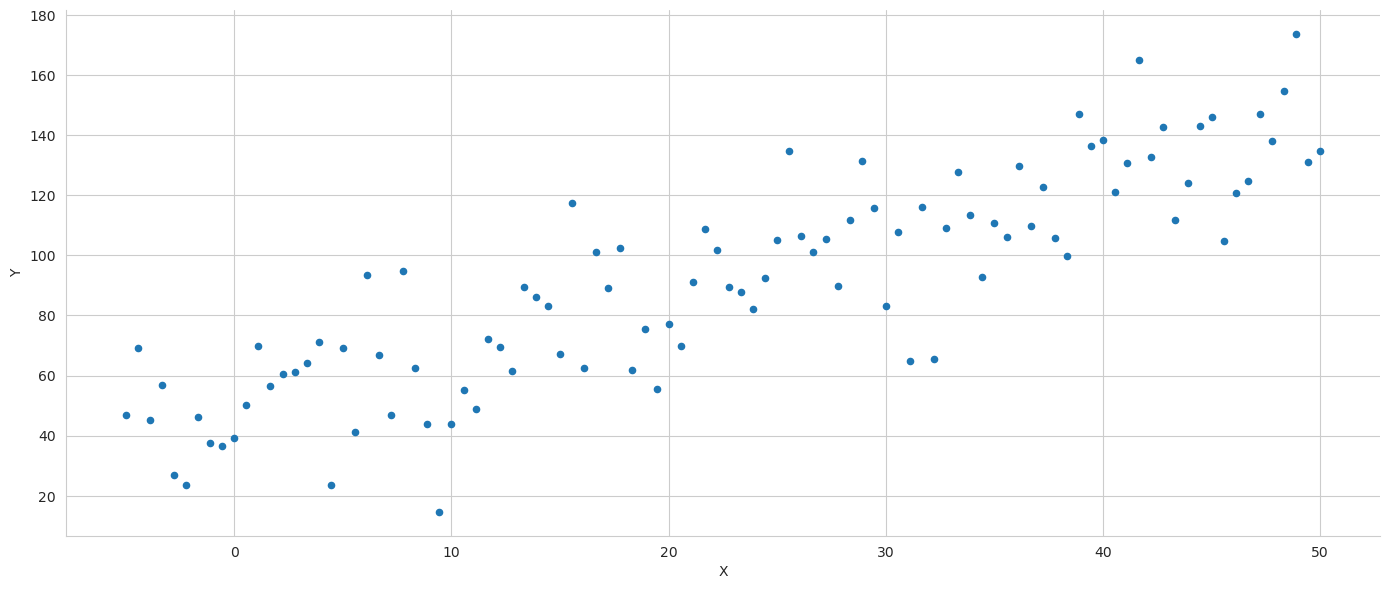

In [27]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

#### Estimate a simple regression with statsmodels

The upper part of the summary displays the dataset characteristics, namely the estimation method, the number of observations and parameters, and indicates that standard error estimates do not account for heteroskedasticity. 

The middle panel shows the coefficient values that closely reflect the artificial data generating process. We can confirm that the estimates displayed in the middle of the summary result can be obtained using the OLS formula derived previously:

In [28]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     286.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           7.43e-31
Time:                        16:59:11   Log-Likelihood:                -430.39
No. Observations:                 100   AIC:                             864.8
Df Residuals:                      98   BIC:                             870.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.0235      3.116     15.412      0.0

#### Verify calculation

In [29]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   48.02
X        1.91
dtype: float64

#### Display model & residuals

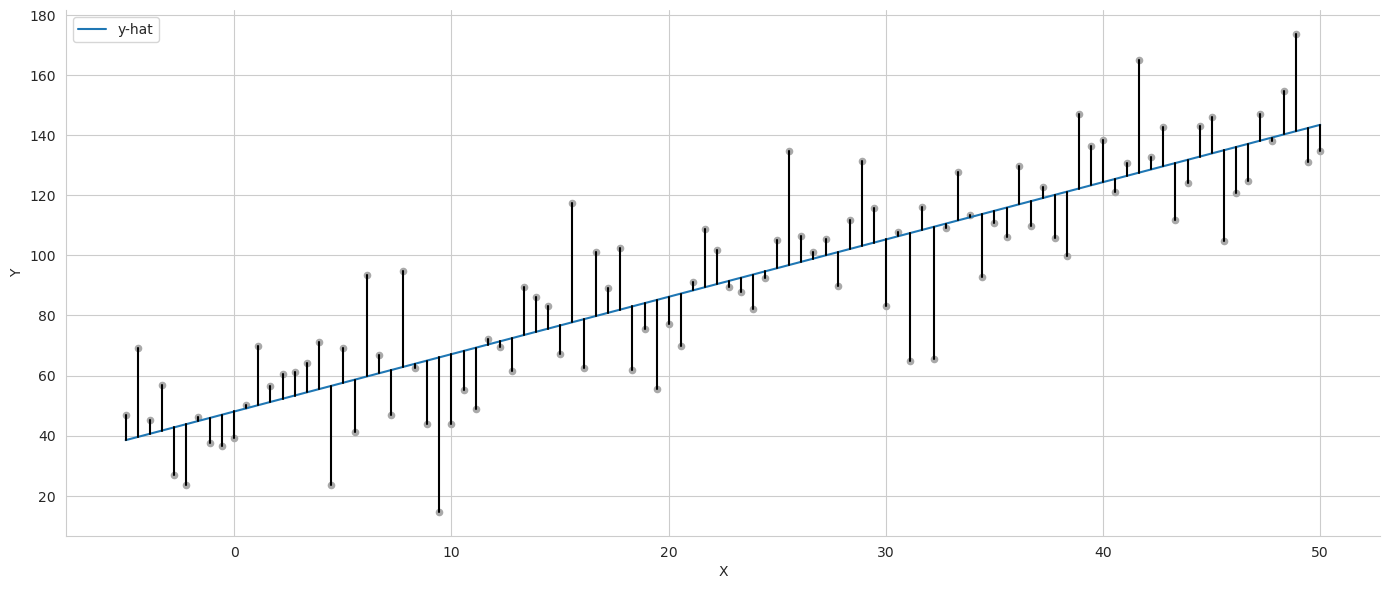

In [30]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

### Multiple Regression


For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### Generate new random data

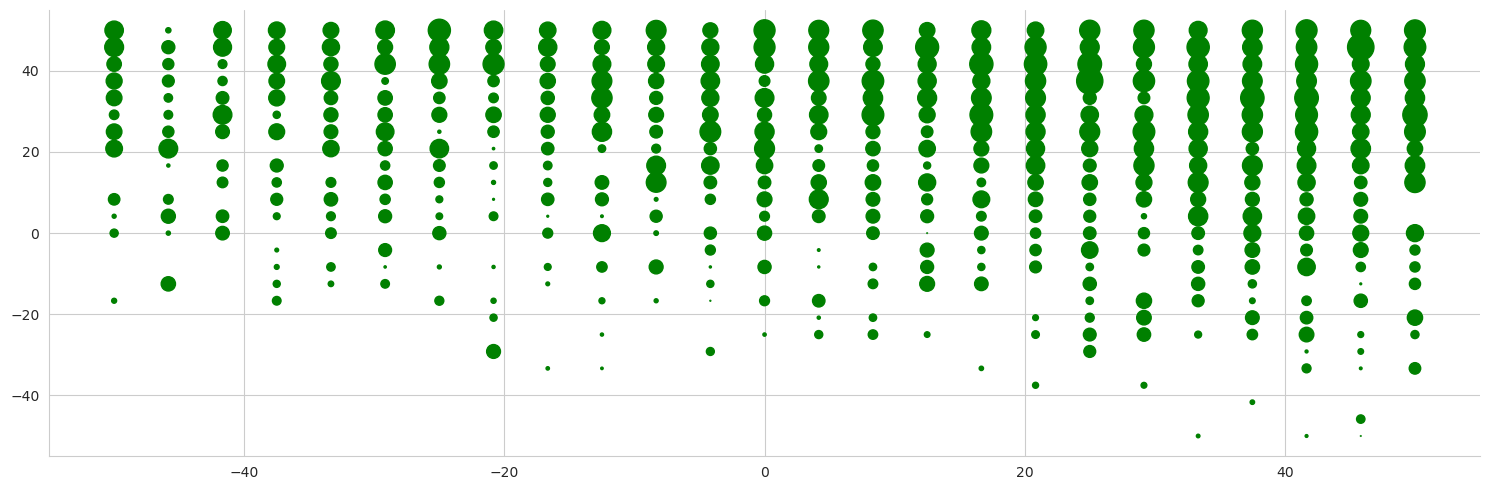

In [31]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca()#projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
sns.despine()
plt.tight_layout();

In [32]:
X = data[['X_1', 'X_2']]
y = data['Y']

#### Estimate multiple regression model with statsmodels

The upper right part of the panel displays the goodness-of-fit measures just discussed, alongside the F-test that rejects the hypothesis that all coefficients are zero and irrelevant. Similarly, the t-statistics indicate that intercept and both slope coefficients are, unsurprisingly, highly significant.

The bottom part of the summary contains the residual diagnostics. The left panel displays skew and kurtosis that are used to test the normality hypothesis. Both the Omnibus and the Jarque—Bera test fails to reject the null hypothesis that the residuals are normally distributed. The Durbin—Watson statistic tests for serial correlation in the residuals and has a value near 2 which, given 2 parameters and 625 observations, fails to reject the hypothesis of no serial correlation.

Lastly, the condition number provides evidence about multicollinearity: it is the ratio of the square roots of the largest and the smallest eigenvalue of the design matrix that contains the input data. A value above 30 suggests that the regression may have significant multicollinearity.

In [33]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1074.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.87e-202
Time:                        16:59:12   Log-Likelihood:                -3344.0
No. Observations:                 625   AIC:                             6694.
Df Residuals:                     622   BIC:                             6707.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.7490      2.044     24.828      0.0

#### Verify computation

In [34]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   50.75
X_1      1.17
X_2      2.93
dtype: float64

#### Save output as image

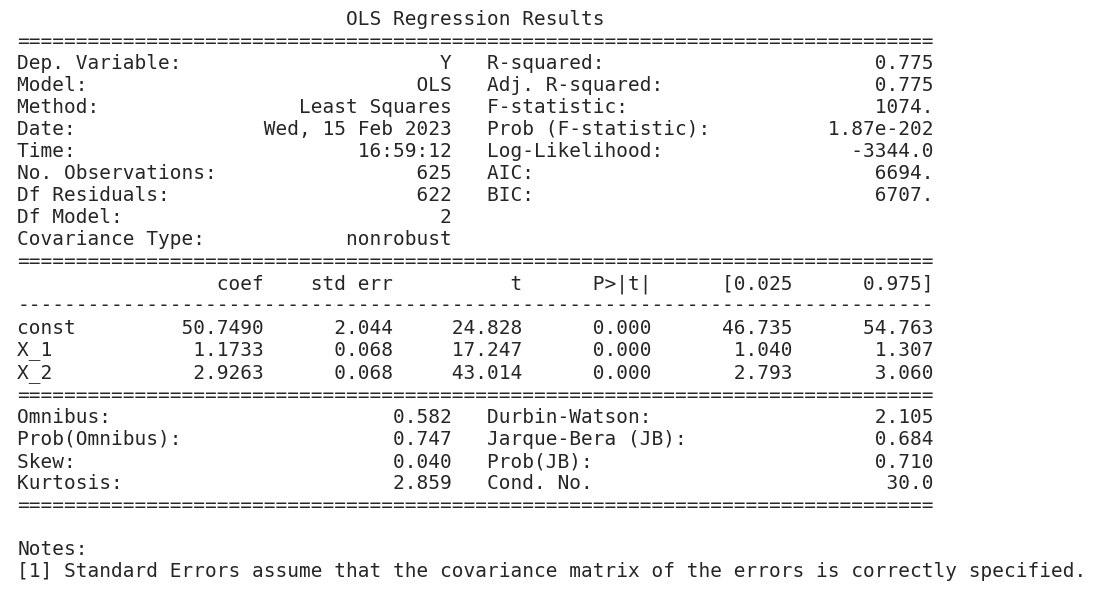

In [35]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

#### Display model & residuals

The following diagram illustrates the hyperplane fitted by the model to the randomly generated data points

In [36]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

TypeError: gca() got an unexpected keyword argument 'projection'

<Figure size 1500x500 with 0 Axes>

Additional [diagnostic tests](https://www.statsmodels.org/dev/diagnostic.html)

## Stochastic Gradient Descent Regression

The sklearn library includes an SGDRegressor model in its linear_models module. To learn the parameters for the same model using this method, we need to first standardize the data because the gradient is sensitive to the scale. 

### Prepare data

The gradient is sensitive to scale and so is SGDRegressor. Use the `StandardScaler` or `scale` to adjust the features. 

We use StandardScaler() for this purpose that computes the mean and the standard deviation for each input variable during the fit step, and then subtracts the mean and divides by the standard deviation during the transform step that we can conveniently conduct in a single fit_transform() command:

In [37]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

### Configure SGDRegressor

Then we instantiate the SGDRegressor using the default values except for a random_state setting to facilitate replication:

In [40]:
sgd = SGDRegressor(loss='squared_error', 
                   fit_intercept=True, 
                   shuffle=True, 
                   random_state=42,
                   learning_rate='invscaling', 
                   eta0=0.01, 
                   power_t=0.25)

### Fit Model

Now we can fit the sgd model, create the in-sample predictions for both the OLS and the sgd models, and compute the root mean squared error for each:

In [41]:
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

As expected, both models yield the same result. We will now take on a more ambitious project using linear regression to estimate a multi-factor asset pricing model.

In [42]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
pd.Series(coeffs, index=X.columns)

X_1   1,051.76
X_2   2,637.91
dtype: float64

In [43]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})

In [44]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   50.98
ols   50.98
dtype: float64

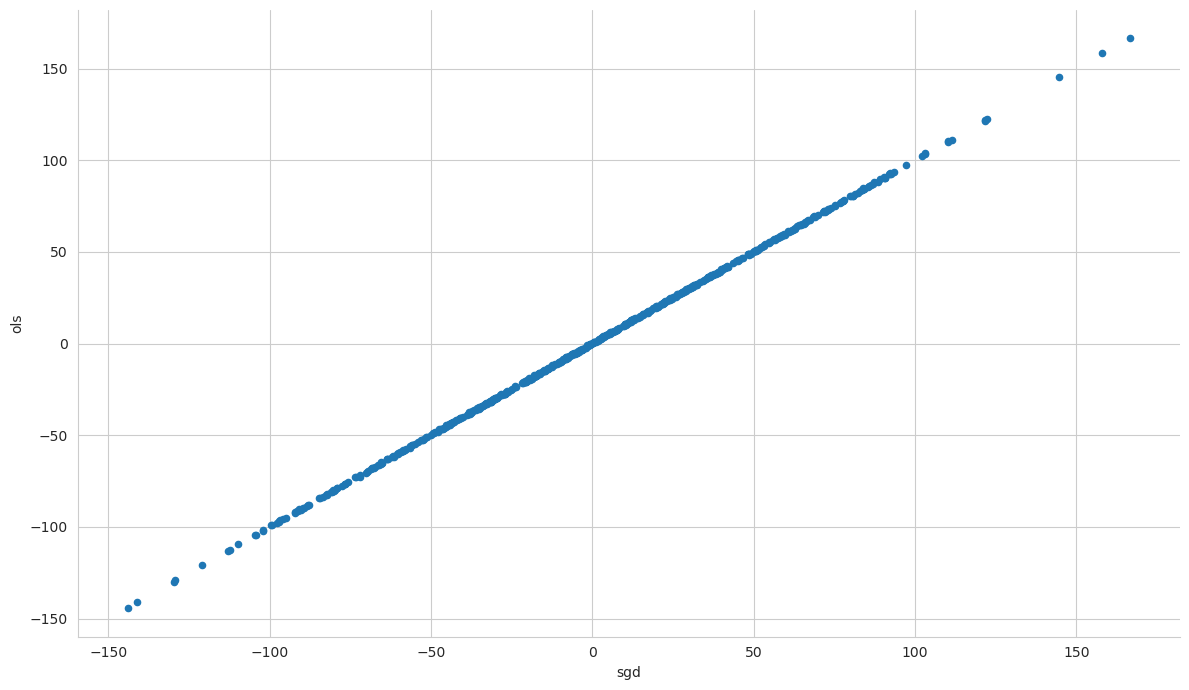

In [45]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();